# Airlines Dataset

# Hierarchical Clustering

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load EastWestAirlines dataset
EWA = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Normalize the EastWestAirlines dataset

In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(EWA.iloc[:,1:])
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Build Hierarchy cluster

In [5]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [6]:
z = linkage(df_norm, method="complete",metric="euclidean")

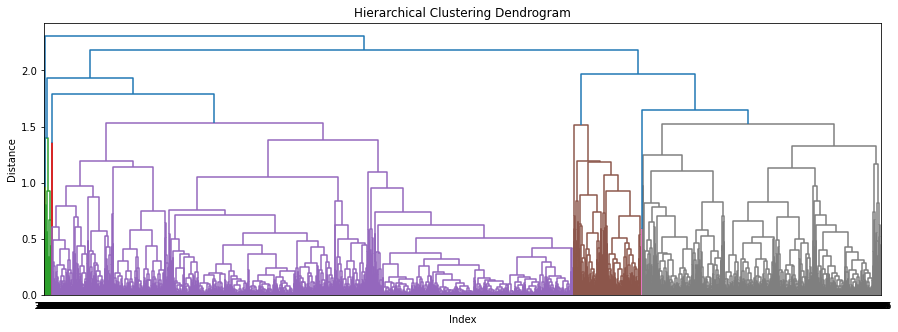

In [7]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [8]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df_norm) 

In [9]:
h_complete.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [10]:
cluster_labels=pd.Series(h_complete.labels_)

In [11]:
EWA['cluster']=cluster_labels # creating a  new column and assigning it to new column 
EWA = EWA.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
EWA.head()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,2,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,2,19244,0,1,1,1,215,2,0,0,6968,0
2,2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,2,4,14776,0,1,1,1,500,1,0,0,6952,0
4,0,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
# getting aggregate mean of each cluster
EWA.groupby(EWA.cluster).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
0,1742.863172,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.

#### As per the above displayed dendogram, we get three clusters. But it really depends on the business case to chose the number of clusters. As i have entered n_clusters as 3 and i chosed linkage='complete' so it has formed 3 cluster and output is obtained for that.

# K-Means Cluster

In [13]:
# import all required libraries
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [14]:
# Generating random uniform numbers 
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X # df_xy["X"] = X
df_xy.Y = Y

<AxesSubplot:xlabel='X', ylabel='Y'>

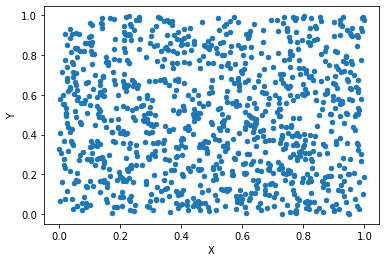

In [15]:
df_xy.plot(x="X",y = "Y",kind="scatter")

In [16]:
model1 = KMeans(n_clusters=5).fit(df_xy)

In [17]:
model1.labels_

array([4, 3, 1, 0, 3, 1, 0, 4, 2, 0, 0, 0, 2, 0, 2, 3, 2, 4, 1, 4, 2, 4,
       4, 4, 3, 1, 3, 1, 2, 1, 3, 3, 2, 2, 0, 4, 4, 2, 2, 3, 4, 1, 0, 3,
       0, 1, 2, 3, 4, 4, 2, 2, 4, 2, 2, 4, 1, 2, 3, 3, 0, 4, 4, 0, 1, 4,
       1, 1, 1, 3, 2, 1, 2, 4, 1, 1, 3, 2, 0, 2, 0, 3, 0, 4, 0, 4, 2, 1,
       3, 1, 1, 4, 2, 1, 1, 2, 1, 4, 3, 4, 3, 4, 0, 3, 3, 3, 3, 1, 1, 1,
       4, 0, 4, 0, 0, 3, 2, 2, 0, 3, 0, 3, 4, 0, 3, 0, 1, 2, 1, 4, 2, 0,
       2, 4, 3, 3, 1, 4, 3, 4, 3, 1, 1, 3, 4, 1, 1, 2, 2, 3, 2, 2, 2, 2,
       4, 4, 4, 4, 3, 4, 0, 0, 1, 2, 3, 1, 3, 2, 2, 3, 0, 2, 4, 3, 2, 3,
       2, 3, 2, 4, 3, 4, 4, 0, 1, 2, 3, 2, 1, 0, 2, 3, 3, 3, 1, 4, 0, 1,
       3, 1, 3, 3, 0, 3, 0, 2, 1, 0, 4, 1, 2, 3, 4, 4, 1, 4, 4, 0, 1, 2,
       1, 1, 4, 1, 3, 1, 0, 4, 2, 0, 3, 2, 2, 1, 4, 2, 3, 3, 0, 4, 1, 1,
       4, 0, 2, 1, 0, 3, 3, 2, 1, 1, 0, 1, 1, 1, 4, 3, 4, 3, 1, 0, 2, 3,
       3, 3, 1, 4, 3, 4, 1, 1, 4, 0, 4, 3, 3, 0, 1, 3, 4, 3, 1, 2, 0, 2,
       3, 1, 3, 3, 0, 3, 4, 3, 4, 2, 0, 3, 3, 0, 0,

In [18]:
model1.cluster_centers_

array([[0.56193262, 0.46358487],
       [0.2209314 , 0.75694633],
       [0.79848829, 0.7753661 ],
       [0.22935717, 0.22887491],
       [0.7658105 , 0.18395827]])

<AxesSubplot:xlabel='X', ylabel='Y'>

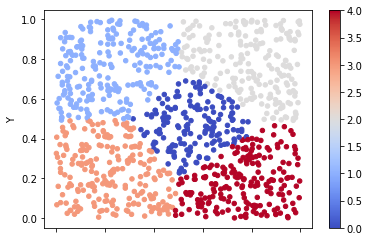

In [19]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",cmap=plt.cm.coolwarm)

In [20]:
# Kmeans on Airlines Data set 
EWA1 = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [21]:
EWA1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Normalize the dataset

In [22]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    #x = (i-i.mean())/i.std()
    return (x)

In [23]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(EWA1.iloc[:,1:])

In [24]:
df_norm.head(10) 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


In [25]:
# screw plot or elbow curve 
k = list(range(1,15))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Build Kmeans cluster

In [26]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2a5b16d4190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

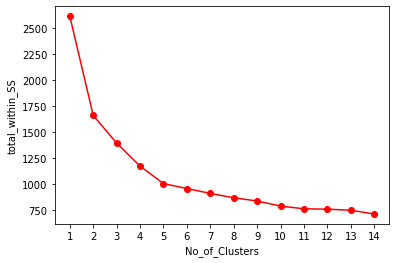

In [27]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [28]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(n_clusters=5)

In [29]:
model.labels_ # getting the labels of clusters assigned to each row 

array([0, 0, 0, ..., 1, 4, 4])

In [30]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [31]:
EWA1['cluster']=md

In [32]:
EWA1.head(10) # creating a  new column and assigning it to new column 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [33]:
EWA1 = EWA1.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [34]:
EWA1.iloc[:,1:14].groupby(EWA.cluster).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
0,1742.863172,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.

#### As observed from the above K-means plotting;with 5 clusters; there is no outliers or overlap has happened.Hence the 5 clusters is good for this model.

# DBSCAN Cluster

In [35]:
# import all required libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [36]:
# load EastWestAirlines dataset
EWA2 = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [37]:
EWA2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [38]:
print(EWA2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [39]:
array=EWA2.values

In [40]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

# Normalize the data

In [41]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [42]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# build DBScan cluster

In [43]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.8)

In [44]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [46]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [47]:
pd.concat([EWA2,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.

#### As observed from the above DBSCAN ; It's epsilon is 0.9 and minpoints is 5 for that there are very less outliers are obtained for this model.

### Compared to all 3 Clustering K-means Clustering and DBSCAN Cluster is good for this model. Because there is  no outliers obtained for this dataset.